# **Iris Dataset Clustering Analysis**


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets  import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Iris Dataset:")
print(feature_names)
print("\nFirst 5 rows of scaled data (X_scaled):")
print(X_scaled[:5])

Iris Dataset Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 rows of scaled data (X_scaled):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


**Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features. Evaluate the clustering by comparing it to the actual species labels.**

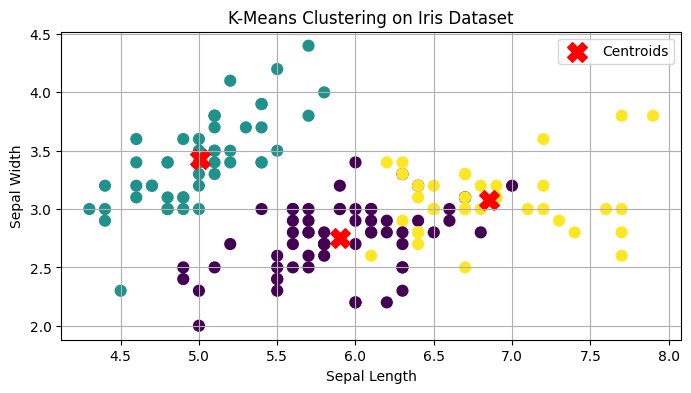

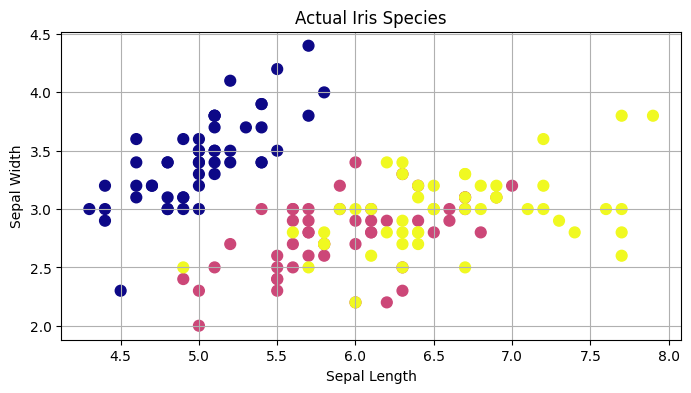

In [35]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# K-Means clusters
plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=60) # Corrected indexing
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

# Actual Species Labels
plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='plasma', s=60)
plt.title('Actual Iris Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()

 ***Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset.***

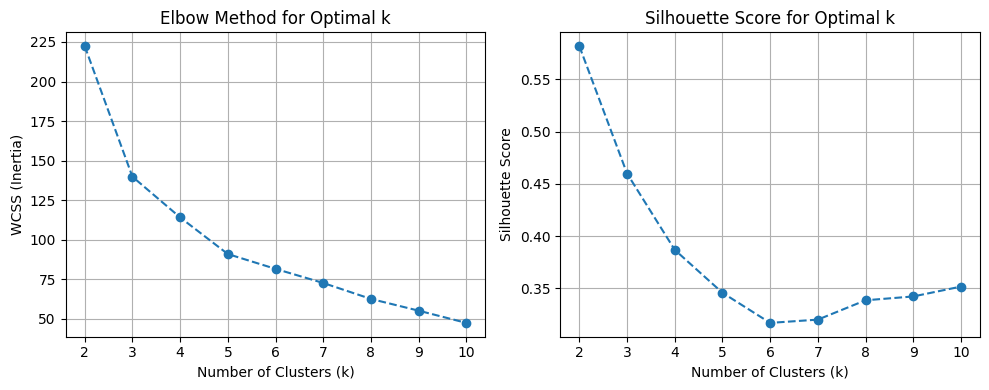

In [23]:
# Range of k to test (2 to 10)
k_range = range(2, 11)
wcss = []       # for Elbow Method
silhouette_scores = []

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled)
    wcss.append(kmeans_model.inertia_)

    # Calculate silhouette score only for k > 1
    if k > 1:
        score = silhouette_score(X_scaled, kmeans_model.labels_)
        silhouette_scores.append(score)


# Elbow Method and Silhouette Score
plt.figure(figsize=(10, 4))

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
# Use k_range for the x-axis to match the length of silhouette_scores
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

**Conclusion** Both the Elbow Method and Silhouette Score strongly confirm that **k=3** is the optimal number of clusters for the Iris dataset.

***Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions.***

Explained Variance Ratio: [0.72962445 0.22850762]
Cumulative Explained Variance: 0.9581320720000166


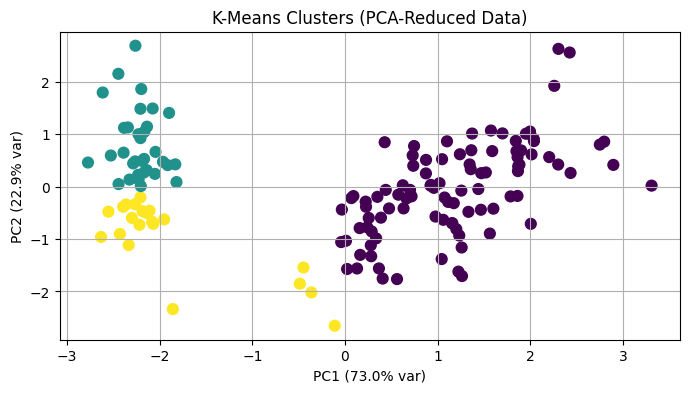

In [32]:
 #Apply PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

#  variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

# Plot results
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=60)
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
plt.grid(True)
plt.show()

**Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.**

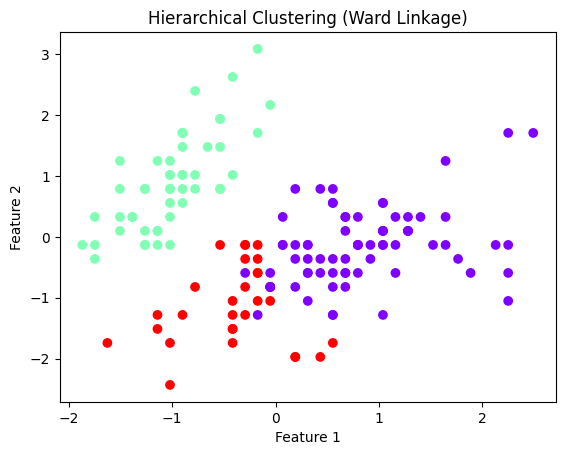

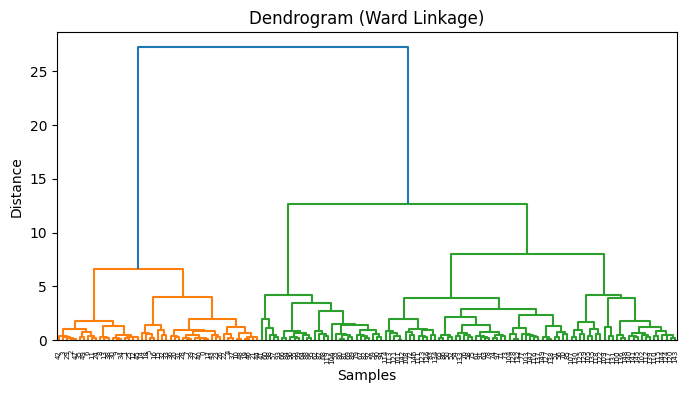

In [31]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
# Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(linkage(X_scaled, method='ward')) # Added missing parenthesis
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

**Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.**



In [37]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

# K-Means scores
ari_kmeans = adjusted_rand_score(y, kmeans_final.labels_)
sil_kmeans = silhouette_score(X_scaled, kmeans_final.labels_)

# Agglomerative scores
ari_agg = adjusted_rand_score(y, agg_labels)
sil_agg = silhouette_score(X_scaled, agg_labels)

# --- Compare Results ---
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative Clustering'],
    'ARI Score': [ari_kmeans, ari_agg],
    'Silhouette Score': [sil_kmeans, sil_agg]
})

print("Clustering Algorithm Comparison:")
print(results)

Clustering Algorithm Comparison:
                  Algorithm  ARI Score  Silhouette Score
0                   K-Means   0.620135          0.459948
1  Agglomerative Clustering   0.615323          0.446689
